In [1]:
from google.colab import drive
drive.mount('/content/drive')


KeyboardInterrupt: 

In [ ]:
# @title
model_path='/content/drive/MyDrive/Minorproj_Nepali_MultiModal/contrastive_model.pt'

In [2]:
!git clone https://github.com/Anil-Banjade/Nepali_Multi_Modal.git

Cloning into 'Nepali_Multi_Modal'...
remote: Enumerating objects: 385, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 385 (delta 64), reused 80 (delta 33), pack-reused 268 (from 1)
Receiving objects: 100% (385/385), 1.93 MiB | 10.36 MiB/s, done.
Resolving deltas: 100% (221/221), done.


In [ ]:
%%capture
!kaggle datasets download -d bipeshrajsubedi/flickr8k-nepali-dataset
!unzip flickr8k-nepali-dataset.zip

In [ ]:
%%capture
!pip install -r requirements.txt

In [ ]:

%cd Nepali_Multi_Modal

/content/Nepali_Multi_Modal


In [ ]:
# @title
import pandas as pd
import re
import torch
import os
from transformers import AutoTokenizer
from src.multimodal_embedding_fusion.config import Configuration
from src.multimodal_embedding_fusion.utils import make_train_valid_dfs
from src.multimodal_embedding_fusion.data.dataset import build_loaders
from src.multimodal_embedding_fusion.models.model import ContrastiveModel

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
# @title
df = pd.read_csv(
    "translated_nepali_captions.txt",
    delimiter='#',
    names=['image', 'caption'],
    engine='python',
    on_bad_lines='skip'
)
df['caption'] = df['caption'].apply(lambda x: re.sub(r'^\d+\s+', '', x))
df['id'] = [i // 5 for i in range(len(df))]
df.to_csv("captions.csv", index=False)

Configuration.image_path = "ficker8k_images/ficker8k_images"
Configuration.captions_path = ""

In [ ]:
model = ContrastiveModel().to(Configuration.device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/652 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/534M [00:00<?, ?B/s]

All TF 2.0 model weights were used when initializing BertModel.

All the weights of BertModel were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertModel for predictions without further training.


In [ ]:
from src.multimodal_embedding_fusion.trainer import train

In [ ]:
# @title
train_df, valid_df = make_train_valid_dfs()
tokenizer = AutoTokenizer.from_pretrained(Configuration.text_tokenizer)
train_loader = build_loaders(train_df, tokenizer, mode="train")
valid_loader = build_loaders(valid_df, tokenizer, mode="valid")

vocab.txt:   0%|          | 0.00/547k [00:00<?, ?B/s]

In [ ]:
train(train_loader, valid_loader, model)


Epoch: 1/5


  0%|          | 0/1012 [00:00<?, ?it/s]

Training Loss: 3.9212


Validation:   0%|          | 0/253 [00:00<?, ?it/s]

Validation Loss: 2.7765
Saved best model. Loss: 2.7765

Epoch: 2/5


  0%|          | 0/1012 [00:00<?, ?it/s]

Training Loss: 1.8302


Validation:   0%|          | 0/253 [00:00<?, ?it/s]

Validation Loss: 1.8638
Saved best model. Loss: 1.8638

Epoch: 3/5


  0%|          | 0/1012 [00:00<?, ?it/s]

Training Loss: 1.7795


Validation:   0%|          | 0/253 [00:00<?, ?it/s]

Validation Loss: 1.7652
Saved best model. Loss: 1.7652

Epoch: 4/5


  0%|          | 0/1012 [00:00<?, ?it/s]

Training Loss: 1.8084


Validation:   0%|          | 0/253 [00:00<?, ?it/s]

Validation Loss: 2.2179

Epoch: 5/5


  0%|          | 0/1012 [00:00<?, ?it/s]

Training Loss: 1.7656


Validation:   0%|          | 0/253 [00:00<?, ?it/s]

Validation Loss: 3.2754


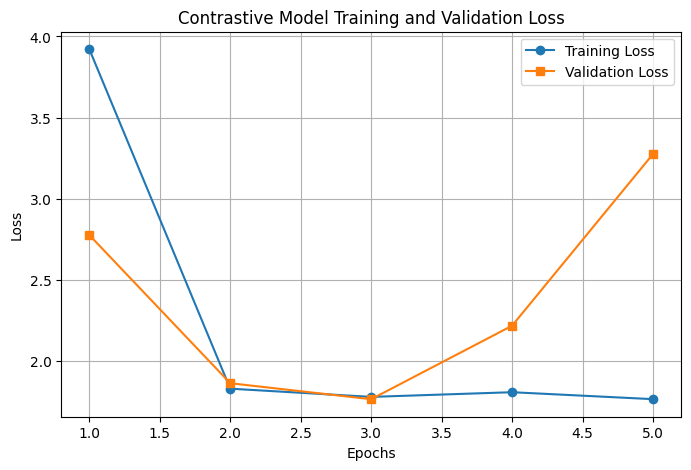

In [ ]:
# @title
import matplotlib.pyplot as plt

epochs = [1, 2, 3, 4, 5]
train_loss = [3.9212, 1.8302, 1.7795, 1.8084, 1.7656]
valid_loss = [2.7765, 1.8638, 1.7652, 2.2179, 3.2754]

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, marker='o', label='Training Loss')
plt.plot(epochs, valid_loss, marker='s', label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Contrastive Model Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/Minorproj_Nepali_MultiModal/contrastive_model.png', dpi=300)
plt.show()

In [ ]:
from src.multimodal_embedding_fusion.models.multimodal_fusion import train_combined

In [ ]:
train_combined(model_path)

All TF 2.0 model weights were used when initializing BertModel.

All the weights of BertModel were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertModel for predictions without further training.
/content/Nepali_Multi_Modal/src/multimodal_embedding_fusion/models/multimodal_fusion.py:58: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user v

Epoch 1:   0%|          | 0/1012 [00:00<?, ?it/s]

Epoch 1, Training Loss: 0.0170


Epoch 1 - Validation:   0%|          | 0/253 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32, 512])) that is different to the input size (torch.Size([1, 32, 512])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([21, 512])) that is different to the input size (torch.Size([1, 21, 512])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Validation Loss: 0.0006
Saved best model with Validation Loss: 0.0006


Epoch 2:   0%|          | 0/1012 [00:00<?, ?it/s]

Epoch 2, Training Loss: 0.0003


Epoch 2 - Validation:   0%|          | 0/253 [00:00<?, ?it/s]

Epoch 2, Validation Loss: 0.0002
Saved best model with Validation Loss: 0.0002


Epoch 3:   0%|          | 0/1012 [00:00<?, ?it/s]

Epoch 3, Training Loss: 0.0002


Epoch 3 - Validation:   0%|          | 0/253 [00:00<?, ?it/s]

Epoch 3, Validation Loss: 0.0001
Saved best model with Validation Loss: 0.0001


Epoch 4:   0%|          | 0/1012 [00:00<?, ?it/s]

Epoch 4, Training Loss: 0.0001


Epoch 4 - Validation:   0%|          | 0/253 [00:00<?, ?it/s]

Epoch 4, Validation Loss: 0.0001
Saved best model with Validation Loss: 0.0001


Epoch 5:   0%|          | 0/1012 [00:00<?, ?it/s]

Epoch 5, Training Loss: 0.0001


Epoch 5 - Validation:   0%|          | 0/253 [00:00<?, ?it/s]

Epoch 5, Validation Loss: 0.0000
Saved best model with Validation Loss: 0.0000
Training completed!


In [ ]:
!mv contrastive_model.pt /content/drive/MyDrive/Minorproj_Nepali_MultiModal/

In [ ]:
!mv fused_embeddings.pt /content/drive/MyDrive/Minorproj_Nepali_MultiModal/

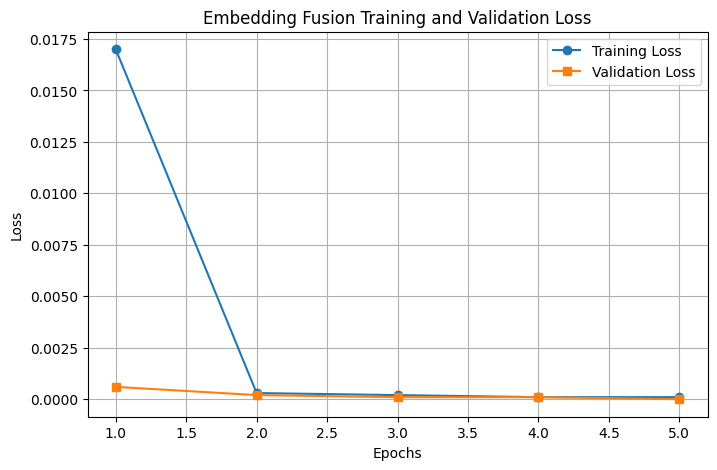

In [ ]:
# @title
import matplotlib.pyplot as plt

epochs = [1, 2, 3, 4, 5]
train_loss = [0.0170,0.0003,0.0002,0.0001,0.0001]
valid_loss = [0.0006,0.0002,0.0001,0.0001,0.0000]

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, marker='o', label='Training Loss')
plt.plot(epochs, valid_loss, marker='s', label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Embedding Fusion Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/Minorproj_Nepali_MultiModal/embedding_fusion_model.png', dpi=300)
plt.show()